#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 9: Other Algorithms and Course Wrap-up
###Monte Carlo

The Monte Carlo method is an approach to understanding the results of a random process or group of random processes. The intuition behind a Monte Carlo (MC) simulation is simple, though the implementation can be tricky. Still, the MC approach is well worth understanding, since it's often the simplest way to explore complicated outcomes driven by a series of random events.

The MC approach is to model the possible outcomes of a random process using a computer simulation and run that simulation a number of times. The results of these simulations will then give you an understanding of the possible outcomes of the process, often in terms of the distributions of certain outcomes or group of outcomes.

To illustrate, let us take the example of flipping a coin. If we wanted to understand the outcome of flipping a coin a number of times, we could calculate out the expectations of the process using some basic probability laws. So, if we flip a coin 10 times, the chance we get four heads is combination(10,4) * .5 or around .21.

We could also flip a coin 10 times to see how many times we got heads. We could then repeat this empirical experiment a number of times (since the outcome is random) and see what the probability of four heads converges to.

But we can take this an empirical step further and rather than physically flipping the coin, we get a computer to simulate the flipping of a coin. Computers can generate random numbers using a function like those found in the "random" library in Python. For example, the function:

x=random.random()

will return a random value (uniformly distributed) between 0 and 1. We can run this code multiple times to get a series of random values for x.

for _ in range (10):
    print random.random()
    
We can then compile the results of this iterative generation of random numbers to get all sorts of measures of the possible outcomes: sums, averages, distributions, and so on.

If we wrap the random function in an "clause" so that any value above .5 returns a value of "tail" (and if not it returns "head"), we have essentially simulated the flipping of a coin.

Let us build on the above example to create a more in-depth simulation.

We're going to use the opportunity to demonstrate an entire Python module and a simple class of object. Objects combine data with functionality. They are most appropriate when you have multiple objects that may have relationships with each other. Thus, for simple coins this is a little bit of overkill, but hopefully this will be helpful in understanding objects.

In [7]:
import random
from numpy.random import normal

# let's create a fair coin object that can be flipped:

class Coin(object):
    '''this is a simple fair coin, can be pseudorandomly flipped'''
    sides = ('heads', 'tails')
    last_result = None

    def flip(self):
        '''call coin.flip() to flip the coin and record it as the last result'''
        self.last_result = result = random.choice(self.sides)
        return result

# let's create some auxilliary functions to manipulate the coins:

def create_coins(number):
    '''create a list of a number of coin objects'''
    return [Coin() for _ in range(number)]

def flip_coins(coins):
    '''side effect function, modifies object in place, returns None'''
    for coin in coins:
        coin.flip()

def count_heads(flipped_coins):
    return sum(coin.last_result == 'heads' for coin in flipped_coins)

def count_tails(flipped_coins):
    return sum(coin.last_result == 'tails' for coin in flipped_coins)


def main():
    coins = create_coins(1000)
    for i in range(100):
        flip_coins(coins)
        print(count_heads(coins))

if __name__ == '__main__':
    main()

509
496
490
501
515
490
489
504
497
498
491
492
489
490
502
481
496
511
472
495
488
510
524
496
515
519
499
488
505
489
519
491
510
492
490
508
504
495
480
505
474
472
473
532
513
515
469
480
504
488
501
475
511
483
516
492
499
489
486
509
504
497
520
516
475
505
493
510
534
492
503
508
511
528
499
481
508
484
488
506
520
482
487
507
495
499
493
479
501
495
485
509
488
500
527
497
505
492
455
502


When we run the script, the module's __name__ will be the __main__ module, and so the main() function will be called. The main function will create 1000 simulated coins. It will then simulate flipping them all 100 times, and then print out the number of them that came up heads. Intuitively, this is a way to get a sense for the range and consistency of possible outcomes if in real life you had to flip a fair coin 100 times (or 100 coins).

What you'll see is that the result is a sum of random variables. The sum of random variables is a normal random variable. That is, the probability space of outcomes will be shaped like a bell curve. If we created a histogram of these outcomes, that is what we'd likely see.

This method can be used to simulate everything from flipping coins and rolling roulette wheels to the performance of portfolios over time.

####Challenge

Modify the above program to generate trials of a normal variable. How does this distribution look different than the coin-flipping example? What should it look like?

In [9]:
%matplotlib inline

(array([  5.,   4.,   8.,  13.,   6.,  18.,  19.,  15.,   6.,   6.]),
 array([ 659. ,  664.8,  670.6,  676.4,  682.2,  688. ,  693.8,  699.6,
         705.4,  711.2,  717. ]),
 <a list of 10 Patch objects>)

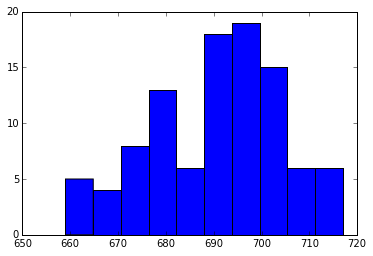

In [10]:
import matplotlib.pyplot as plt

def flip(p):
    if random.normalvariate(0, 1) < p: # drawing from normal distribution
        return 'heads'
    else:
        return 'tails'

count_ = [] 
no_experiments = 100
no_of_trials_in_experimet = 1000
     
for i in range(no_experiments): 
    list_ = []  
    for j in range(no_of_trials_in_experimet):
        list_.append(flip(p = 0.5))
    count_.append(list_.count('heads'))
    
plt.hist(count_)   

Modify the above program to track the maximum and minimum of each trial of normal variables. Run 100 simulations of these trials. What does the distribution extremes look like? What should it look like?